In [21]:
from scipy.stats import norm
import numpy as np
from plot_utils import *
import matplotlib.pyplot as plt
from scipy.stats.mstats import mquantiles

plt.rcParams['figure.figsize'] = [30, 8]
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\jwigm\AppData\Local\Temp\ipykernel_28112\881454783.py:8: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# What are we doing?
Take $n$ samples and estimate the pth quantile using:
1. Order statistics 
2. Distribution estimation

6.644853626951472

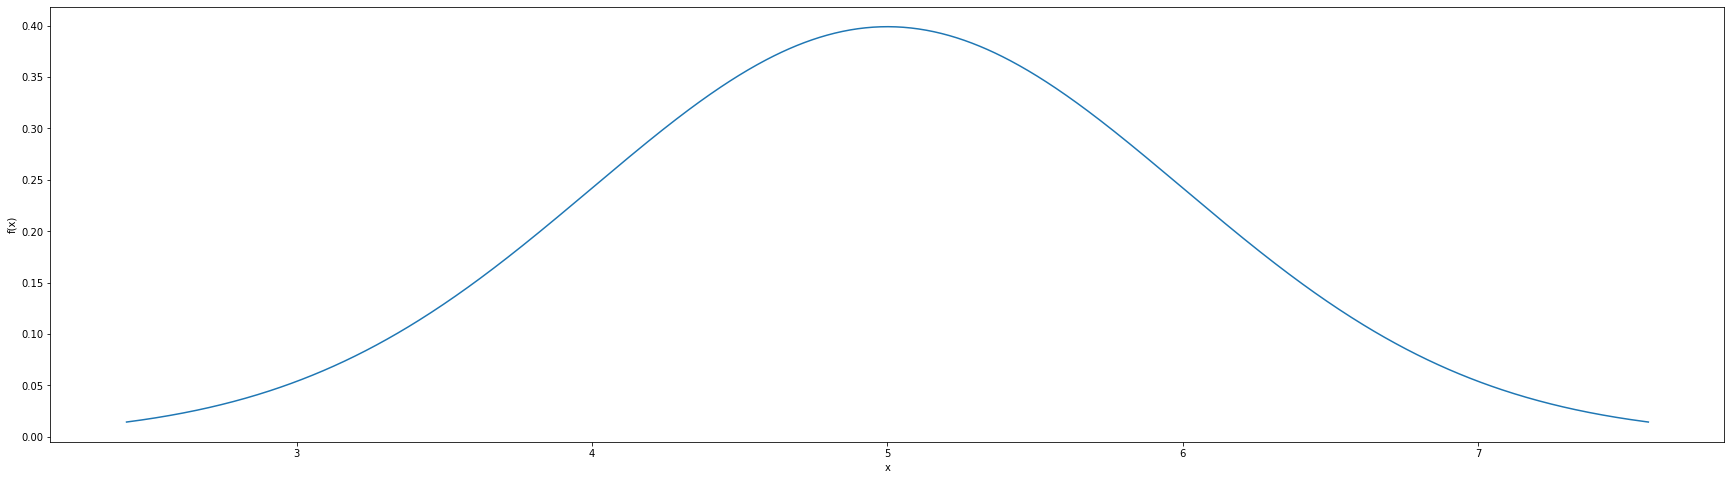

In [2]:
# Parameter Setup
p = 0.95
K_i = 500

## Band distribution
mu_i = 5 # Mean of the band generative distribution
sigma_i = 1 #Standard deviation of the band generative distribution
Band = norm(mu_i, sigma_i)
q = Band.ppf(p)
plot_rv(Band)
q


In [3]:
q_os = np.zeros(K_i)
q_de = np.zeros(K_i)


for n in range(2,K_i):
    samps = Band.rvs(n)
    mu_est = np.mean(samps)
    sigma_est = np.std(samps)
    ordered_samps = np.sort(samps)
    o = int(np.ceil(p*n))-1 # taking the ceiling for the order-stastic index
    q_os[n] = ordered_samps[o]
    q_de[n] = norm.ppf(p,loc = mu_est, scale = sigma_est)
    
    


In [4]:
error_os = abs(q-q_os)
error_de = abs(q-q_de)

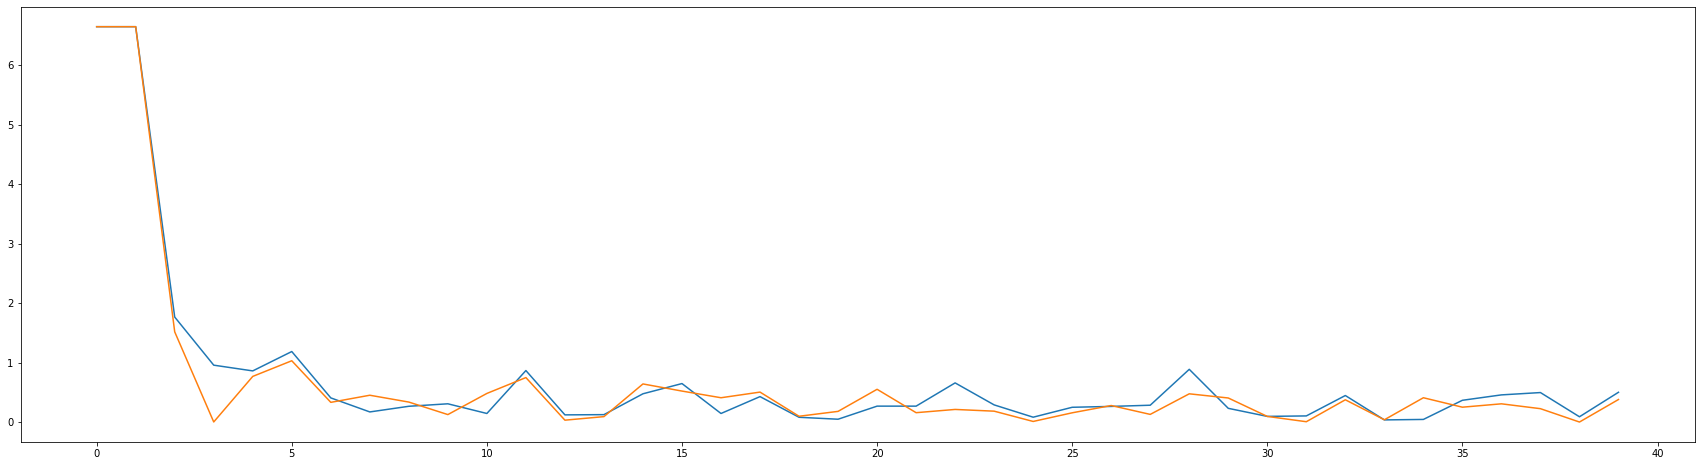

In [5]:
fig, ax = plt.subplots()
ax.plot(error_os[:40])
ax.plot(error_de[:40])

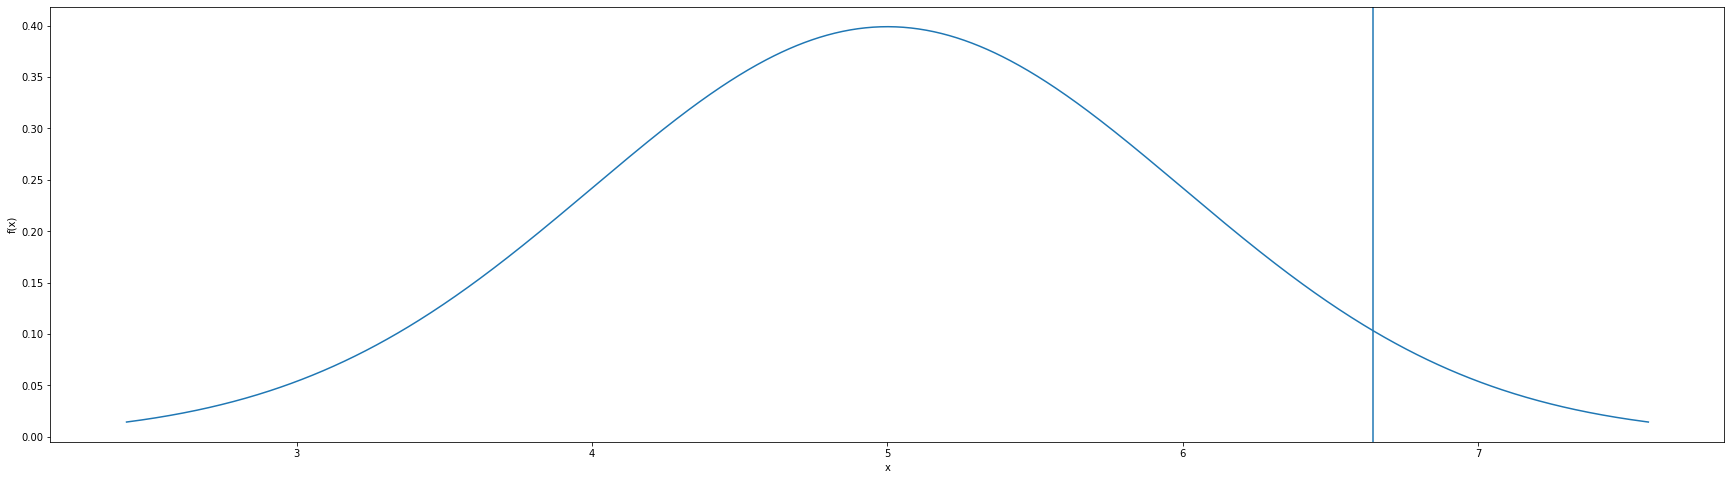

In [6]:
M = 1000
p = 0.95
K_i = 500
L = ['Order-Statistic (Ceil)', 'Order-Statistic (Avg)', 'Parameter Estimation (PE)', 'PE - Known $\sigma_i$']
## Band distribution
mu_i = 5 # Mean of the band generative distribution
sigma_i = 1 #Standard deviation of the band generative distribution
Band = norm(mu_i, sigma_i)
q = Band.ppf(p)
fig, ax = plot_rv(Band)
plt.axvline(x=q)




In [9]:
Q_os = np.zeros([M, K_i])
Q_os_2 = np.zeros([M, K_i])
Q_de = np.zeros([M,K_i])
Q_de_1 = np.zeros([M,K_i])
for m in range(M):
    q_os = np.zeros(K_i)
    q_de = np.zeros(K_i)
    for n in range(2,K_i):
        samps = Band.rvs(n)
        mu_est = np.mean(samps)
        sigma_est = np.std(samps)
        ordered_samps = np.sort(samps)
        o = int(np.ceil(p*n))-1 # taking the ceiling for the order-stastic index
        Q_os[m,n] = ordered_samps[o] 
        Q_os_2[m,n] = (ordered_samps[o]+ordered_samps[o-1])/2
        Q_de[m,n] = norm.ppf(p,loc = mu_est, scale = sigma_est)
        Q_de_1[m,n] = norm.ppf(p, loc= mu_est, scale = 1)



In [15]:
Mean_Q_os = np.mean(Q_os, axis = 0)
Mean_Q_os_2 = np.mean(Q_os_2, axis = 0)
Mean_Q_de = np.mean(Q_de, axis = 0)
Mean_Q_de_1 = np.mean(Q_de_1, axis = 0)


mean_error_os = q - Mean_Q_os
mean_error_os_2 = q-Mean_Q_os_2
mean_error_de = q - Mean_Q_de
mean_error_de_1 = q - Mean_Q_de_1
ME = np.array([mean_error_os, mean_error_os_2, mean_error_de, mean_error_de_1])
ME.shape

(4, 500)

In [ ]:
var_error_os = 

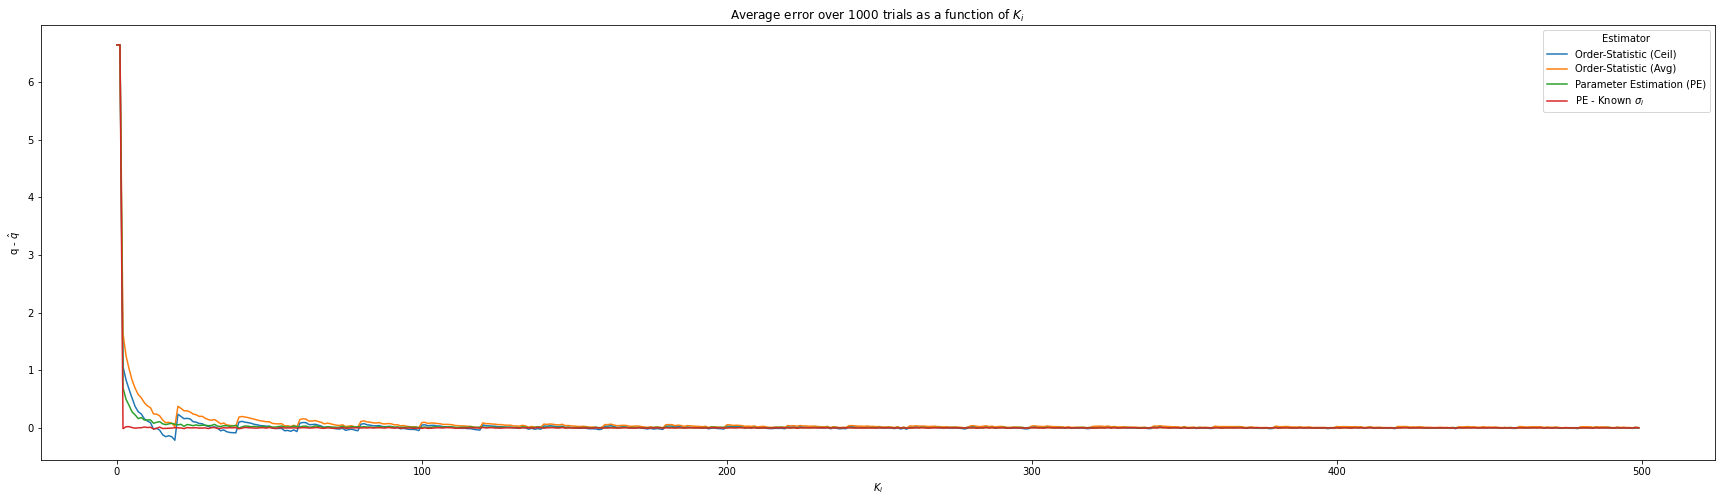

In [11]:
fig, ax = plt.subplots()
ax.plot(ME.T, label = L)
# ax.plot(mean_error_os.T[:], label = L[0])
# ax.plot(mean_error_de.T[:], label = L[1])
# ax.plot(mean_error_de_1.T[:], label = L[2])
ax.set_title(f"Average error over {M} trials as a function of $K_i$")
ax.set_xlabel(f"$K_i$")
ax.set_ylabel(f"q - $\hat{{q}}$")
ax.legend(title = "Estimator")



<span style="font-size:1.5em;">
There is obviously a major difference between the estimates when $K_i \ll 100$ and when $K_i\geq 100$
    
Lets zoom in on the different segments

</span>


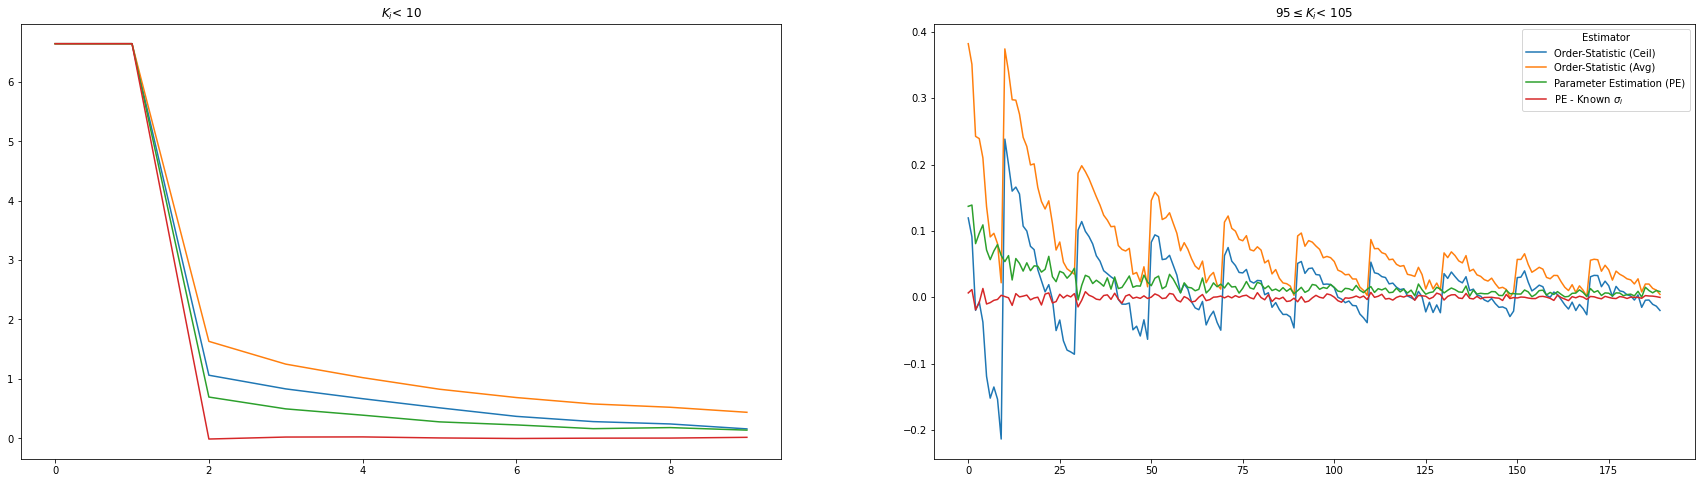

In [16]:
fig, axs = plt.subplots(1,2)
axs[0].plot(ME.T[:10], label = L)
axs[0].set_title(f"$K_i$< 10")
axs[1].plot(ME.T[10:200], label = L)
axs[1].set_title(f"95$\leq K_i$< 105")
axs[1].legend(title = "Estimator")
# axs[2].plot(ME.T[20:500], label = L)
# axs[2].set_title(f" $K_i \geq 200$")

In [66]:
M = 100

T_vec = np.zeros([8,M,K_i])


Type = {'de':[],
        'de1': [],
        4:(0,1),
       5:(.5,.5),
       6:(0,0),
       7:(1,1),
        8:(1/3, 1/3),
        9:(3/8,3/8)
}

In [48]:
Type.keys()

dict_keys(['de', 'de1', 4, 5, 6, 7, 8, 9])

In [67]:
for m in range(M):
    q_os = np.zeros(K_i)
    q_de = np.zeros(K_i)
    for n in range(2,K_i):
        samps = Band.rvs(n)
        mu_est = np.mean(samps)
        sigma_est = np.std(samps)
        #ordered_samps = np.sort(samps)
        #o = int(np.ceil(p*n))-1 # taking the ceiling for the order-stastic index
#         Q_de[m,n] = norm.ppf(p,loc = mu_est, scale = sigma_est)
#         Q_de_1[m,n] = norm.ppf(p, loc= mu_est, scale = 1)
        ind = 0
        for t in Type.keys():
            if t == 'de':
                T_vec[ind, m,n] = norm.ppf(p,loc = mu_est, scale = sigma_est)
            elif t == 'de1': 
                T_vec[ind, m,n] = norm.ppf(p, loc= mu_est, scale = 1)
            else:
                T_vec[ind,m,n] = mquantiles(samps, p, alphap=Type[t][0], betap = Type[t][1])
            ind +=1

In [68]:
labels = list(Type.keys())

TypeMeans = np.mean(T_vec, axis = 1)
TypeVar = np.var(T_vec, axis = 1)








In [57]:
labels

['de', 'de1', 4, 5, 6, 7, 8, 9]

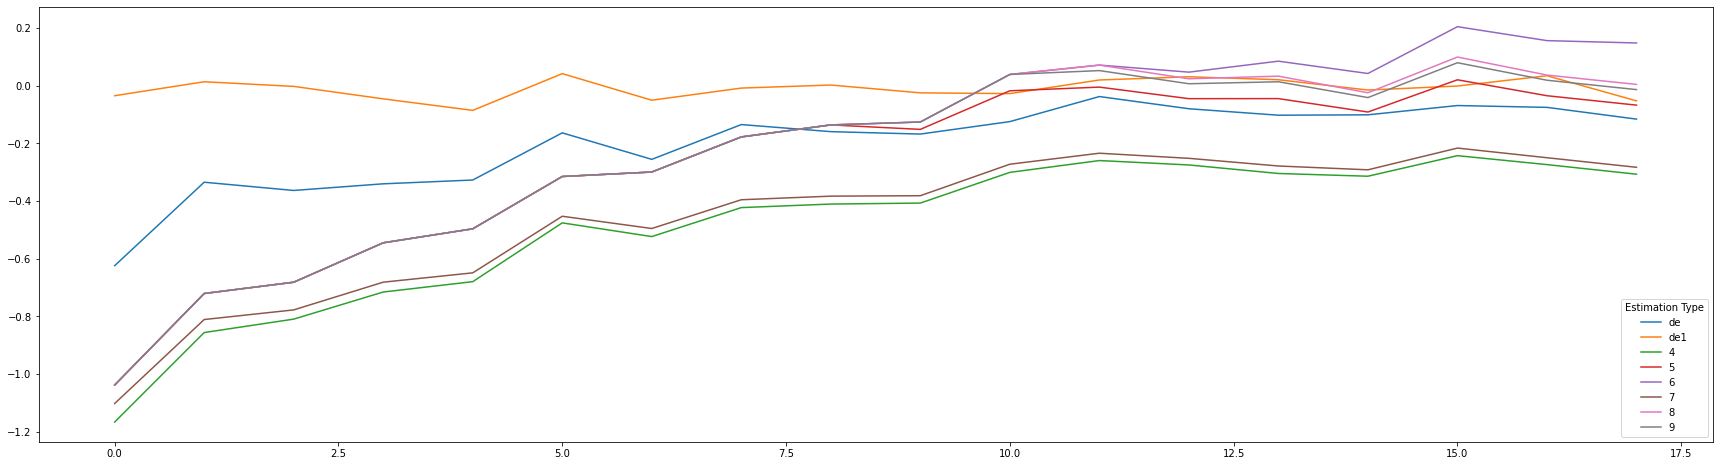

In [69]:
fig, ax = plt.subplots()
ax.plot(TypeMeans.T[2:20]-q, label = labels)
ax.legend(title = "Estimation Type")




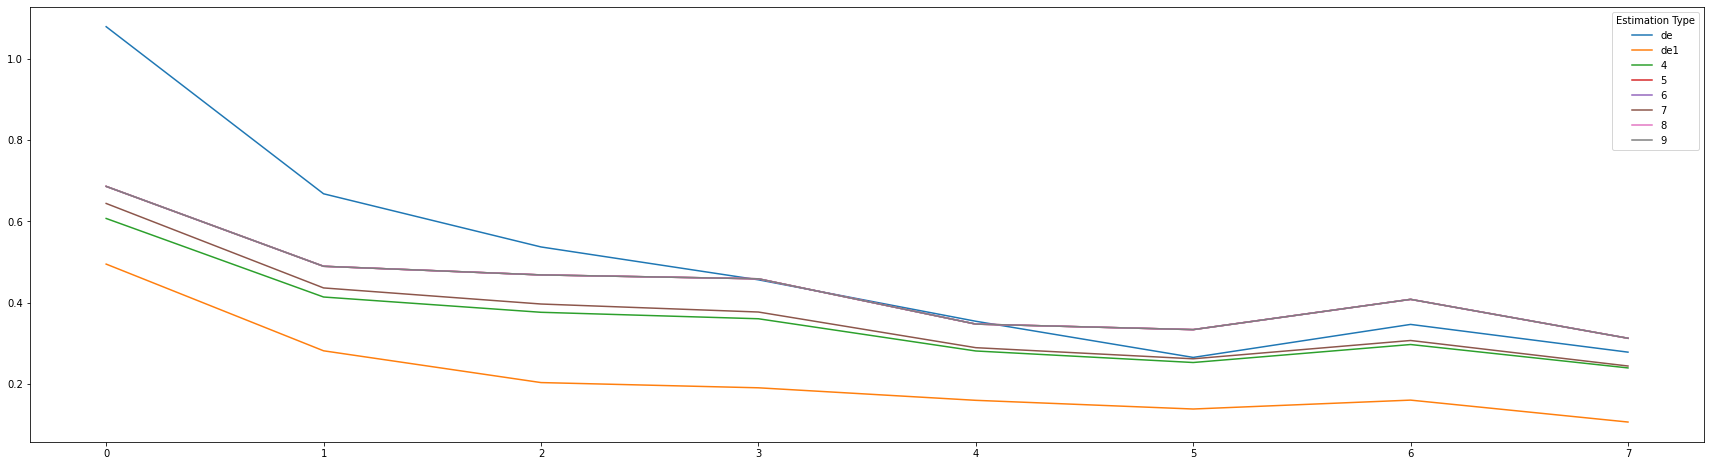

In [71]:
fig, ax = plt.subplots()
ax.plot(TypeVar.T[2:10], label = labels)
ax.legend(title = "Estimation Type")